## init

In [108]:
# import sys 
# sys.path.append('pyfiles/')

from pyfiles import (parametrics as par,
    complex as cplx,
    matrix as mat,
    vineyard as vin,
    input as inp,
    plot as ourplot
)

# so we don't have to reboot kernel every time we modify classes.py
%load_ext autoreload
%autoreload 2

# math stuff
import numpy as np
import math
from collections import defaultdict
# visualization
from scipy.spatial import Voronoi, voronoi_plot_2d
from scipy.ndimage import gaussian_filter1d
from scipy.spatial import distance
from scipy.stats import qmc
from copy import deepcopy

import matplotlib.pyplot as plt
%matplotlib inline

import csv
import string

# for polygon grid
from matplotlib.path import Path as mplPath

######## NOTE: from this point on, order is important. 
# it would be good to make the code more robust, but right
# now, there are ordered dependencies between functions.

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## this is the new, streamlined thing

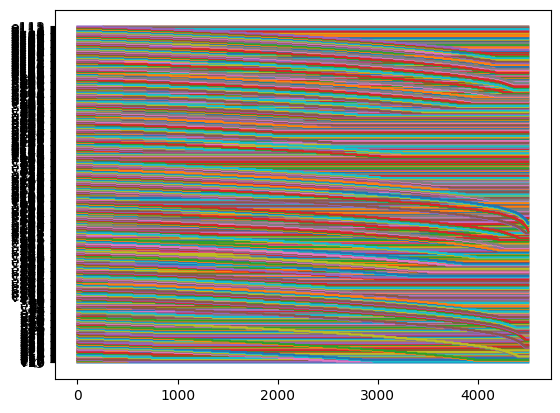

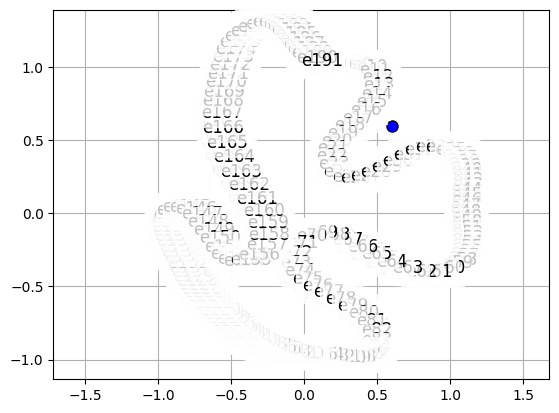

∅ — v16 — v17 — e16 — v15 — e15 — v18 — e17 — v14 — e14 — v19 — e18 — v13 — e13 — v20 — e19 — v31 — v30 — e30 — v32 — e31 — v29 — e29 — v12 — e12 — v21 — e20 — v11 — e11 — v28 — e28 — v33 — e32 — v10 — e10 — v22 — e21 — v9 — e9 — v27 — e27 — v8 — e8 — v23 — e22 — v7 — e7 — v34 — e33 — v26 — e26 — v6 — e6 — v24 — e23 — v25 — e24 — e25 — v5 — e5 — v4 — e4 — v3 — e3 — v35 — e34 — v2 — e2 — v1 — e1 — v0 — e0 — v36 — e35 — v37 — e36 — v191 — e191 — v38 — e37 — v190 — e190 — v39 — e38 — v40 — e39 — v189 — e189 — v41 — e40 — v42 — e41 — v188 — e188 — v43 — e42 — v44 — e43 — v45 — e44 — v187 — e187 — v46 — e45 — v47 — e46 — v186 — e186 — v68 — v69 — e68 — v67 — e67 — v48 — e47 — v185 — e185 — v70 — e69 — v49 — e48 — v66 — e66 — v184 — e184 — v50 — e49 — v51 — e50 — v183 — e183 — v71 — e70 — v65 — e65 — v52 — e51 — v182 — e182 — v53 — e52 — v64 — e64 — v181 — e181 — v162 — v161 — e161 — v54 — e53 — v163 — e162 — v72 — e71 — v180 — e180 — v160 — e160 — v164 — e163 — v55 — e54 — v63 — e63 — v179 

In [115]:
our_complex = inp.read_obj("input/blob.obj")
key_point1 = (0.4, 0.6)
key_point2 = (0.6, 0.6)
o = cplx.ordering.by_dist_to(our_complex, key_point1)
o2 = cplx.ordering.by_dist_to(our_complex, key_point2)
matrix = mat.bdmatrix.from_ordering(o)
# with ourplot.PandasMatrix(matrix, o) as p:
#     matrix.reduce(every_step=p.every_step)

bettis = defaultdict(int)
def after_column_reduced(mat, j):
    if mat.get(j, set()):
        death = o.simplex(j)
        birth = o.simplex(max(mat.get(j, set())))
        bettis[birth.dim()] -= 1
        print(f'col {j}:')
        print(f'  birth={birth}')
        print(f'  death={death}')
    else:
        s = o.simplex(j)
        bettis[s.dim()] += 1
        print(f'col {j}: reduced to zero: {s}')

ourplot.plot_orders_with_bubbles(o, o2)

In [110]:
our_complex = inp.read_obj("input/blob.obj")
key_point1 = (0.75, 0.40)
key_point2 = (0.75, 0.25)
o = cplx.ordering.by_dist_to(our_complex, key_point1)
o2 = cplx.ordering.by_dist_to(our_complex, key_point2)
matrix = mat.bdmatrix.from_ordering(o)

n = our_complex.nedges() + our_complex.nverts() + 1
V = np.eye(n, dtype=int)
def record_column_adds(sparsemat, indices, old_column):
  V[:, indices[0]] = (V[:, indices[0]] + V[:, indices[1]]) % 2

matrix.reduce(every_step=record_column_adds);
assert (((matrix.initmatrix @ V) % 2) == matrix.reduced).all(), 'Something is wrong with the column reduction'

U = np.absolute(np.linalg.inv(V).astype(int)) % 2

assert (((U @ V) % 2) == np.eye(n, dtype=int)).all(), 'U@V didn\'t give identity matrix'
assert (((V @ U) % 2) == np.eye(n, dtype=int)).all(), 'V@U didn\'t give identity matrix'



In [111]:
our_complex = inp.read_obj("input/triangle.obj")
key_point1 = (0.75, 0.40)
o = cplx.ordering.by_dist_to(our_complex, key_point1)
matrix = mat.bdmatrix.from_ordering(o)

knowledge = mat.reduction_knowledge(matrix, o)
knowledge.run()

# R = DV
D = matrix.initmatrix
R = matrix.reduced

V = np.eye(D.shape[0], dtype=int);
for (target, other) in knowledge.adds:
  V[:, target] = (V[:, target] + V[:, other]) % 2
assert (((D @ V) % 2) == R).all(), 'Something is wrong with the column reduction'

# RU = D
U = vin.matrix_inverse(V)

assert (((R @ U) % 2) == D).all(), 'Something is wrong with the column reduction'


for i in range(0, R.shape[0] - 1):
  P = vin.permutation_matrix(R.shape[0], i, i + 1)
  PDP = (P.T @ D @ P) % 2
  (RR, UU, faustian_swap) = vin.perform_one_swap(i, knowledge, R, U)
  RRUU = (RR @ UU) % 2
  assert (RRUU == PDP).all(), 'Something is wrong with the column reduction'


y = 0.0
pt_i = 0
reduction start
reduction end
inverse start
inverse end
swapped_indices = #8696
pt_i = 1
swapped_indices = #2501
pt_i = 2
swapped_indices = #1463
pt_i = 3
swapped_indices = #1402
pt_i = 4
swapped_indices = #1303
y = 0.05
pt_i = 0
reduction start
reduction end
inverse start
inverse end
swapped_indices = #4922
pt_i = 1
swapped_indices = #4035
pt_i = 2
swapped_indices = #2000
pt_i = 3
swapped_indices = #1547
pt_i = 4
swapped_indices = #1157
y = 0.1
pt_i = 0
reduction start
reduction end
inverse start
inverse end
swapped_indices = #2783
pt_i = 1
swapped_indices = #4291
pt_i = 2
swapped_indices = #3654
pt_i = 3
swapped_indices = #2151
pt_i = 4
swapped_indices = #1581
y = 0.15000000000000002
pt_i = 0
reduction start
reduction end
inverse start
inverse end
swapped_indices = #2403
pt_i = 1
swapped_indices = #2782
pt_i = 2
swapped_indices = #4158
pt_i = 3
swapped_indices = #2954
pt_i = 4
swapped_indices = #2274
y = 0.2
pt_i = 0
reduction start
reduction end
inverse start
invers

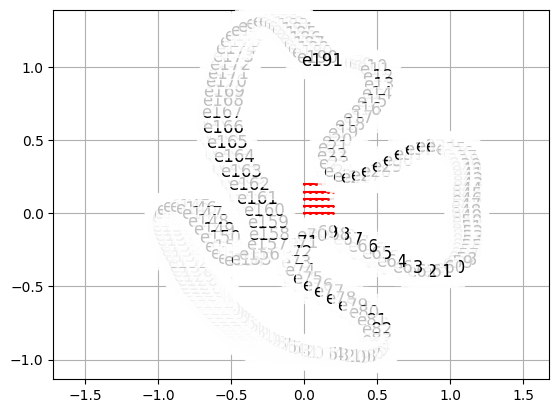

In [116]:

our_complex = inp.read_obj("input/blob.obj")
ourplot.plot_complex(our_complex, label_edges=True, label_verts=True)
key_point1 = (0.0, 0.6)

N = 5
for y in np.linspace(0.0, 0.2, N):
  print(f'y = {y}')
  def get_pairs_of_points(i, n):
    return (
      [0.2 * i / n, y],
      [0.2 * (i+1)/n, y]
    )

  for pt_i in range(0, N):
    print(f'pt_i = {pt_i}')
    (key_point1, key_point2) = get_pairs_of_points(pt_i, N)
    if pt_i == 0:
      o1 = cplx.ordering.by_dist_to(our_complex, key_point1)

      matrix = mat.bdmatrix.from_ordering(o1)
      knowledge = mat.reduction_knowledge(matrix, o1)
      print(f'reduction start')
      knowledge.run()
      print(f'reduction end')

      # R = DV
      D = matrix.initmatrix
      R = matrix.reduced

      V = np.eye(D.shape[0], dtype=int);
      for (target, other) in knowledge.adds:
        V[:, target] = (V[:, target] + V[:, other]) % 2
      assert (((D @ V) % 2) == R).all(), 'Something is wrong with the column reduction'

      # RU = D
      print(f'inverse start')
      U = vin.matrix_inverse(V)
      print(f'inverse end')
      assert (((R @ U) % 2) == D).all(), 'Something is wrong with the column reduction'

    o1 = cplx.ordering.by_dist_to(our_complex, key_point1)
    o2 = cplx.ordering.by_dist_to(our_complex, key_point2)
    (swapped_simplices, _, swapped_indices) = o1.compute_transpositions(o2)

    found_faustian = False
    print(f'swapped_indices = #{len(swapped_indices)}')
    for (swap_i, i) in enumerate(swapped_indices):
      P = vin.permutation_matrix(R.shape[0], i, i + 1)
      PDP = (P.T @ D @ P) % 2
      (RR, UU, faustian_swap) = vin.perform_one_swap(i, knowledge, R, U)

      if faustian_swap:
        found_faustian = True

      RRUU = (RR @ UU) % 2
      # assert (RRUU == PDP).all(), 'Something is wrong with the column reduction'
      R = RR
      U = UU
      D = PDP

    # f = 0.5
    # pt = (1 - f) * np.array(key_point1) + f * np.array(key_point2)
    if found_faustian:
      plt.plot([key_point1[0], key_point2[0]], [key_point1[1], key_point2[1]], 'o-', markersize=1, color='red' )
    else:
      plt.plot([key_point1[0], key_point2[0]], [key_point1[1], key_point2[1]], '-', alpha=0.2, color='gray' )

